In [54]:
import os
from scipy.io import loadmat

# Ruta principal donde se encuentran los subdirectorios
main_dir = "outputs"

# Inicializar lista para almacenar el contenido de los archivos .mat
list_perform = []

# Recorrer todos los subdirectorios y archivos
for root, dirs, files in os.walk(main_dir):
    for file in files:
        # Si el archivo es 'perform.mat', lo cargamos
        if file == 'perform.mat':
            # Construir la ruta completa al archivo
            file_path = os.path.join(root, file)
            # Cargar el archivo .mat
            mat_data = loadmat(file_path)
            # Añadir el contenido del archivo a la lista
            list_perform.append(mat_data)

# Ahora list_perform contiene todos los archivos perform.mat cargados
print(f"Se han cargado {len(list_perform)} archivos 'perform.mat'.")

Se han cargado 18 archivos 'perform.mat'.


In [55]:
i=0
print(list_perform[i].keys())
print(list_perform[i]['dic_name'])
print(list_perform[i]['NMSE'])


dict_keys(['__header__', '__version__', '__globals__', 'dic_name', 'rm_sk_ids', 'beta_star', 'NMSE_lin', 'NMSE', 'frqMAC', 'MAC_lin', 'MAC', 'beta_set', 'Jcurve'])
['BS_m_128_n_128_vsc_2_hsc_2_bases_0.5_0.5_thV_15_thH_15.mat']
[[-7.03092951]]


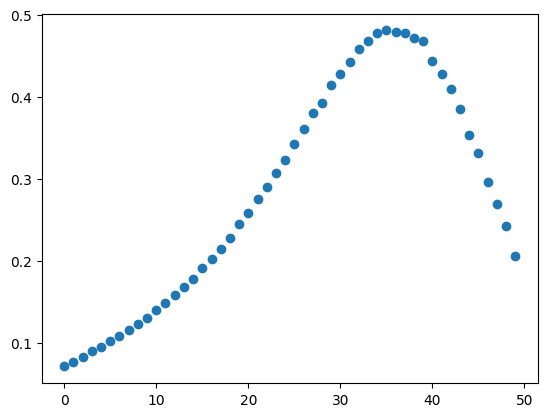

In [56]:
import matplotlib.pyplot as plt

x = list_perform[i]['beta_set']
y = list_perform[i]['Jcurve'].flatten()
plt.plot(y,'o')
plt.show()
# y.shape